<a href="https://colab.research.google.com/github/WinstonTNguyen/THD-Adv.Programming/blob/main/Winston's_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Wine quality prediction
**Author:** Winston Vu-Thanh-Nguyen Nguyen

---






### Outline

- <a href='#1'>1. Problem definition</a>

- <a href='#2'>2. Data collection </a>  

- <a href='#3'>3. Data analysis </a>
    - <a id='#3.1'>3.1. Target feature (quality) </a>
    - <a id='#3.2'>3.2. Checking the rest of the features </a>
    - <a id='#3.3'>3.3. Data exploratory </a>

- <a href='#4'>4. Feature engineering </a>
    - <a id='#4-1'>4.1. Log transform </a>
    - <a id='#4-2'>4.2. Dealing with imbalanced data</a>

- <a href='#5'>5-6. Modeling and evaluating </a>
  

### <a id='1'>1. Problem definition


- **Input:** an overview table of wine indicators
- **Output:** Classification of wine based on quality

**Objective:** Build a machine learning model based on the training set (including input and output) to predict the quality of wine based on a number of classifiers which are covered in class lectures:

*   Logistic Regression
*   K-Nearest Neighbors (Uniform and Weighted)
*   Support Vector Machine
*   Decision Tree
*   Random Forest

And a touch of Exploratory Data Analysis and Feature Engineering to further improve our results. :)


### <a id='2'>2. Data collecting

With the [Wine Quality dataset](https://archive.ics.uci.edu/dataset/186/wine+quality) from UC Irvine, there are 2 csv files, one for Red wine and one for White wine

In [1]:
## Importing the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

from IPython.display import Image

In [2]:
import warnings
warnings.filterwarnings("ignore")

Concat the two dataframes

In [3]:
dfRed=pd.read_csv("winequality-red.csv", sep=";")
dfRed.insert(0, 'type', 'red', True)
#dfRed.head(10)

In [4]:
dfWhite=pd.read_csv("winequality-white.csv", sep=";")
dfWhite.insert(0, 'type', 'white', True)
#dfWhite.head(10)

In [5]:
df=pd.concat([dfRed, dfWhite])
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,red,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,red,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,red,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,red,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### <a id='3'> 3. Data analysis

In [6]:
## Let's look at the whole shape of dataframe
print("Dataframe shape: {}".format(df.shape))

Dataframe shape: (6497, 13)


#### <a id='3.1'> 3.1 Target feature (quality)


<Axes: xlabel='quality', ylabel='count'>

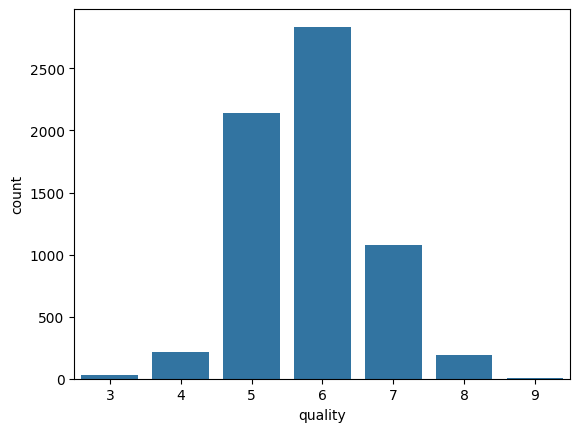

In [7]:
## Distribution of our target feature quality
sns.countplot(data=df, x='quality')

**Key takeaway:** the number of wines with quality 5 and 6 is many times larger than other classes. If we keep the same distribution, there may be problems predicting the quality of the wine, because the data is imbalanced.
=> We can handle it by reducing the number of classes 5 and 6 (undersampling) or increasing the number of other classes (oversampling).

#### <a id='3.2'> 3.2 Checking the rest of the features
We will look through the data set, in order to notice noisy and missing data, check the type of columns and adjust them to standard to use for analysis.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [9]:
## Finding out if there are any missing value
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Key takeaway:** This is a really nice dataset, with no missing data at all, we don't need to do anything here

#### <a id='3.3'>3.3 Data exploratory

With the describe() function, we can statistically see a summary of the data.

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


First, we need to realize that the fields are distributed at different scales, so later we will need to rescale the data.

Second, there is a single object field (type), we will check to see if the color of the wine (red or white) has a big effect on quality or not?

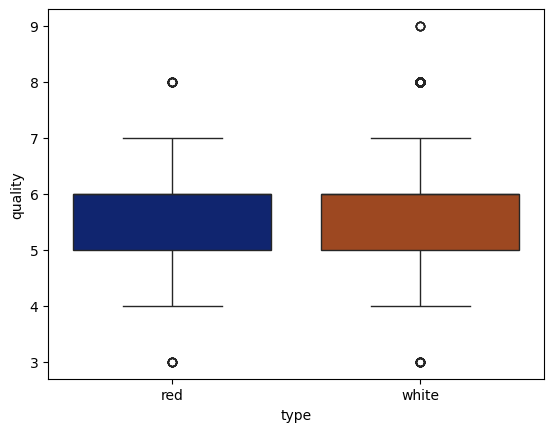

In [11]:
sns.boxplot(x="type",y="quality",data=df, palette="dark")
plt.show()

=> We see that the type of wine mostly has no effect on the quality of the wine => We can drop this column later

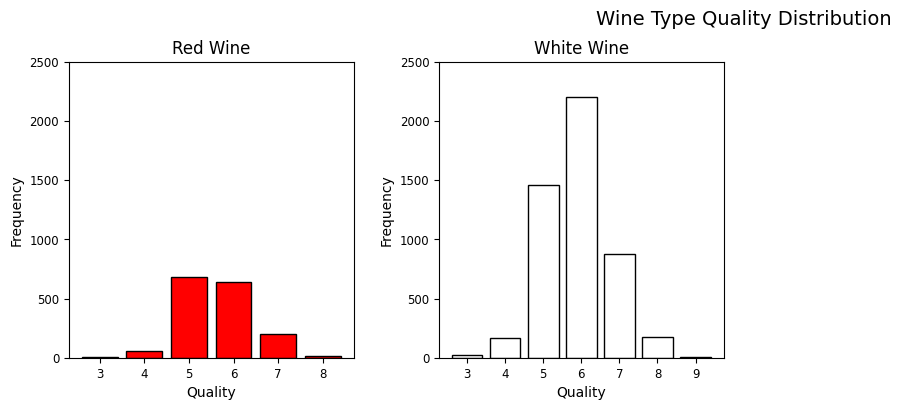

In [12]:
## Plotting the distribution of quality, based on wine type
fig = plt.figure(figsize = (18, 4))
title = fig.suptitle("Wine Type Quality Distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,4, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency")
rw_q = df.quality[df.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,4, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency")
ww_q = df.quality[df.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', edgecolor='black', linewidth=1)

Now let's try to find out the correlation of each feature with the quality of the wine.



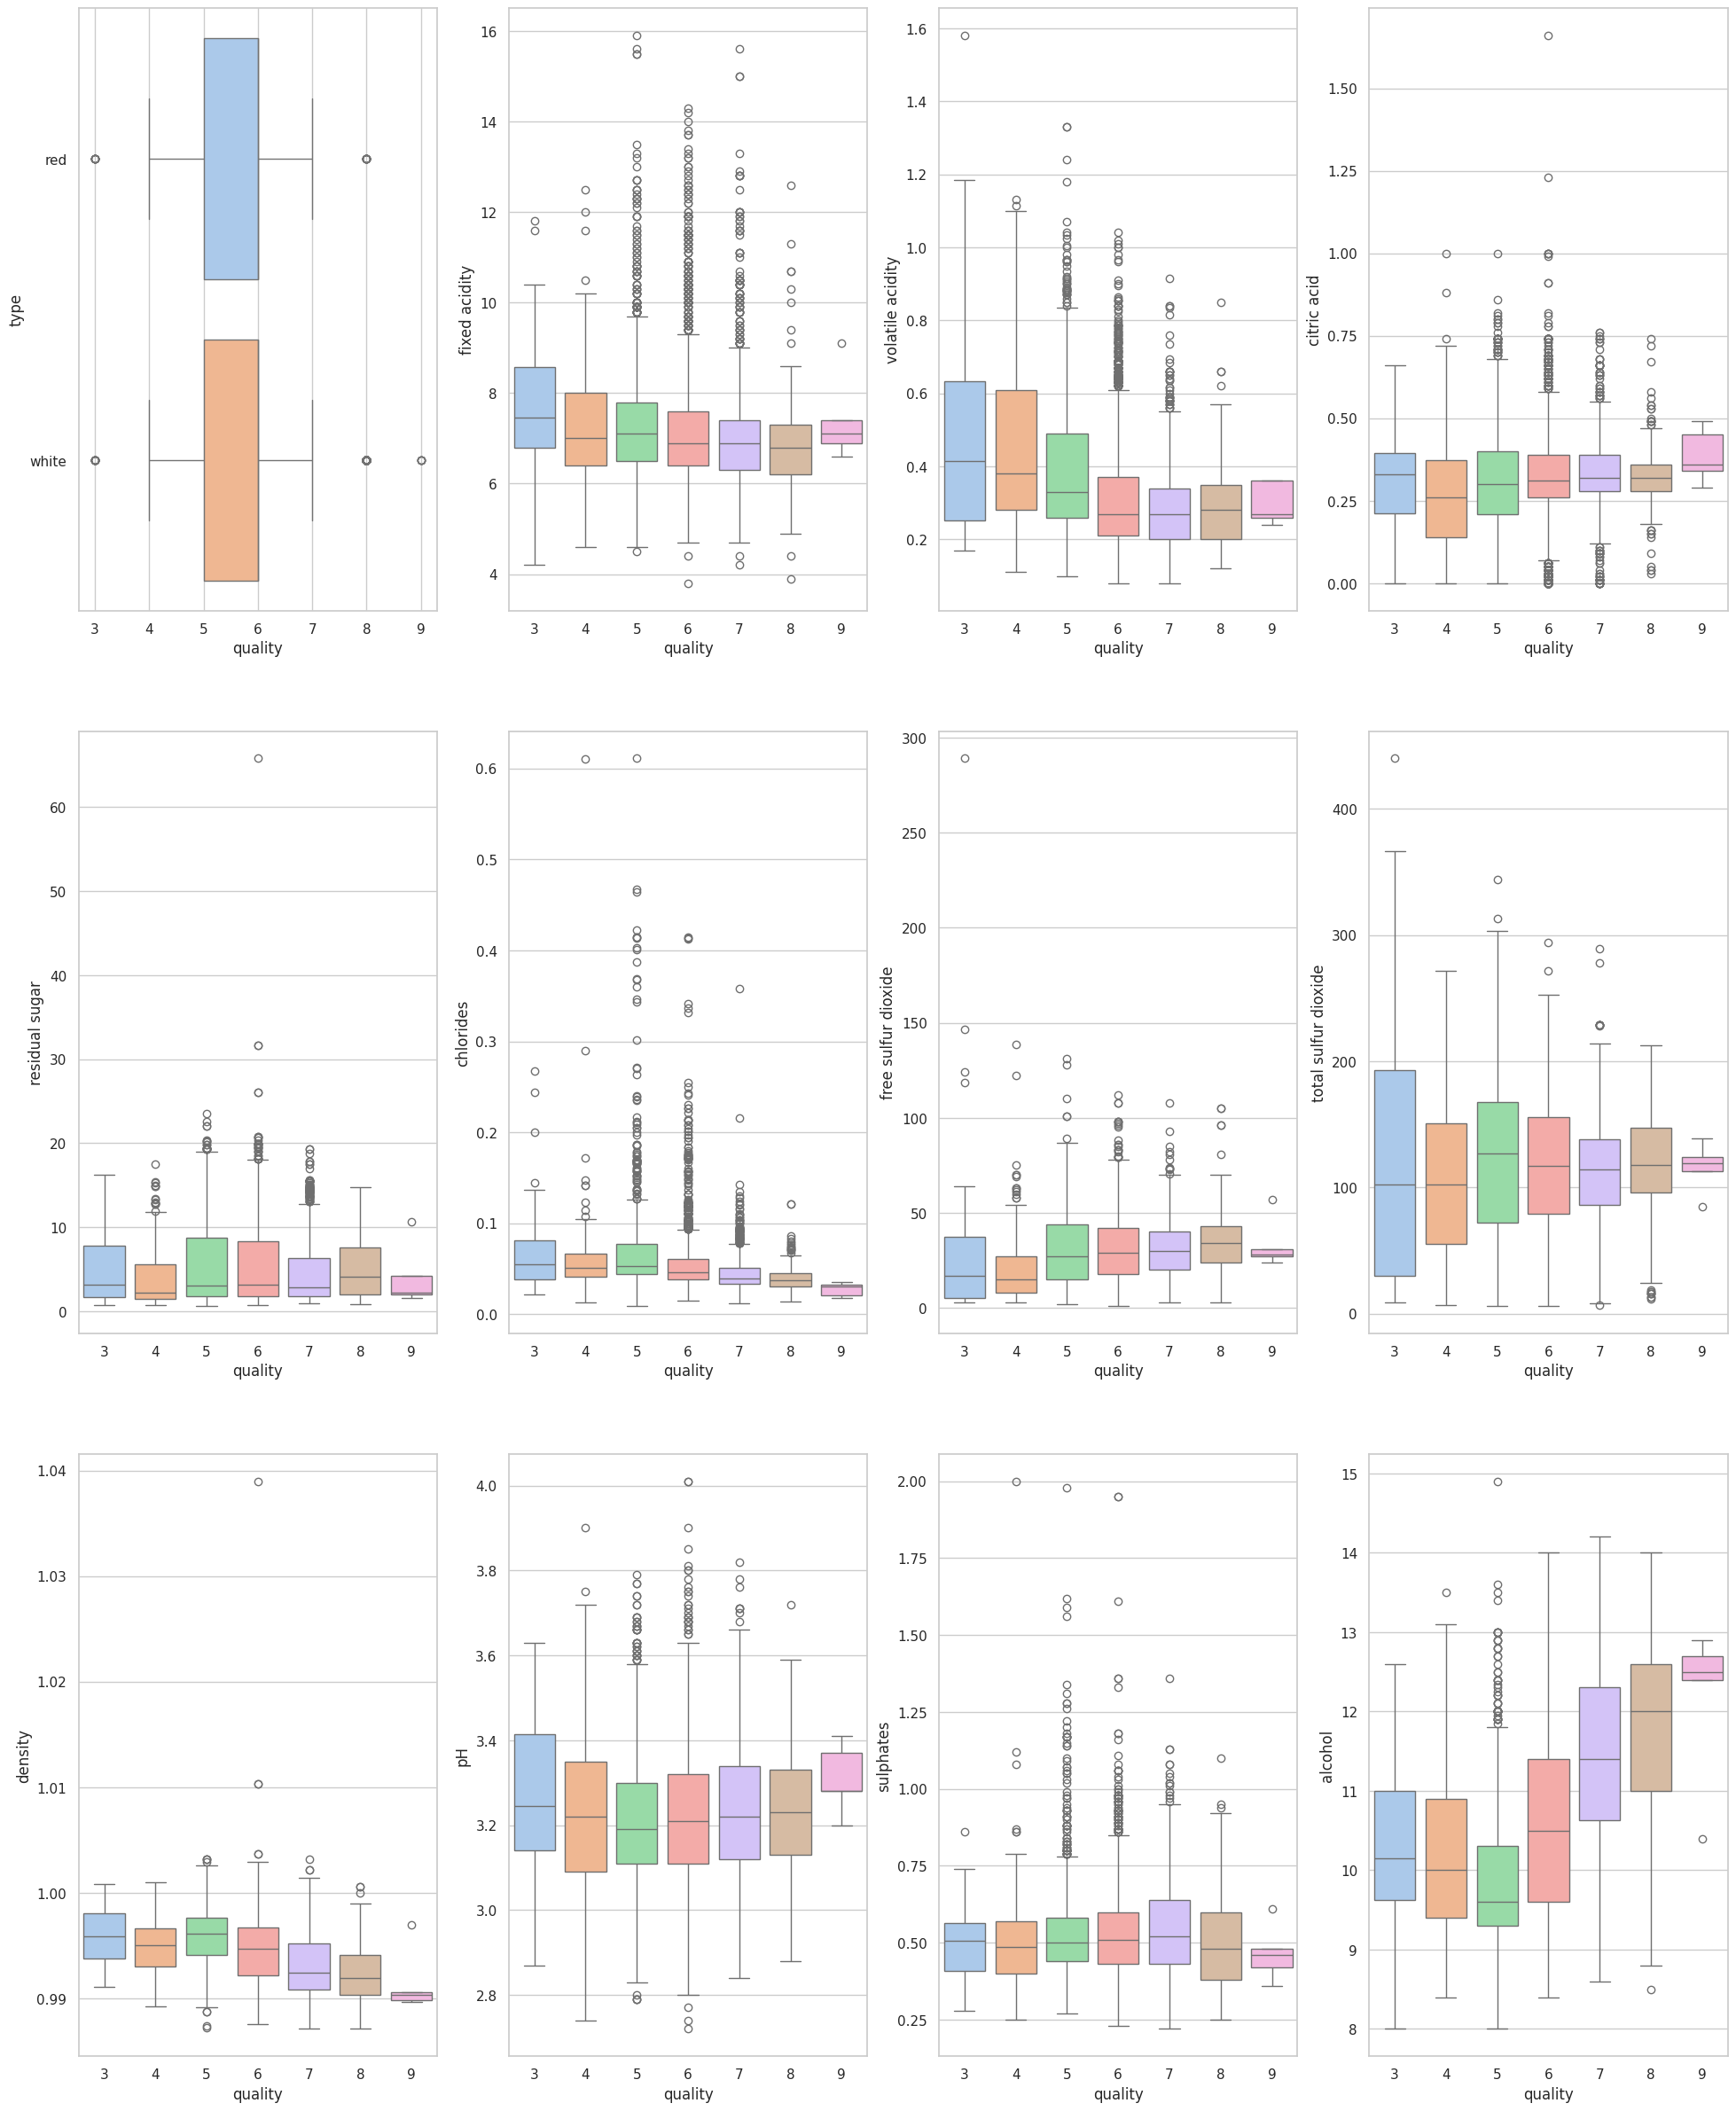

In [13]:
## Plotting the distribution of each feature

sns.set(style="whitegrid")
fig, ax1 = plt.subplots(3, 4, figsize=(24, 30))
columns = [col for col in df.columns if col != 'quality']  # Exclude 'quality' from plotting columns
k = 0
for i in range(3):
    for j in range(4):
        if k < len(columns):
            sns.boxplot(x='quality', y=columns[k], data=df, ax=ax1[i][j], palette='pastel')
            k += 1

# Show the plot
plt.show()

**Takeaway:** Every feature has outliers! -> We'll have to deal with them later!

<Axes: >

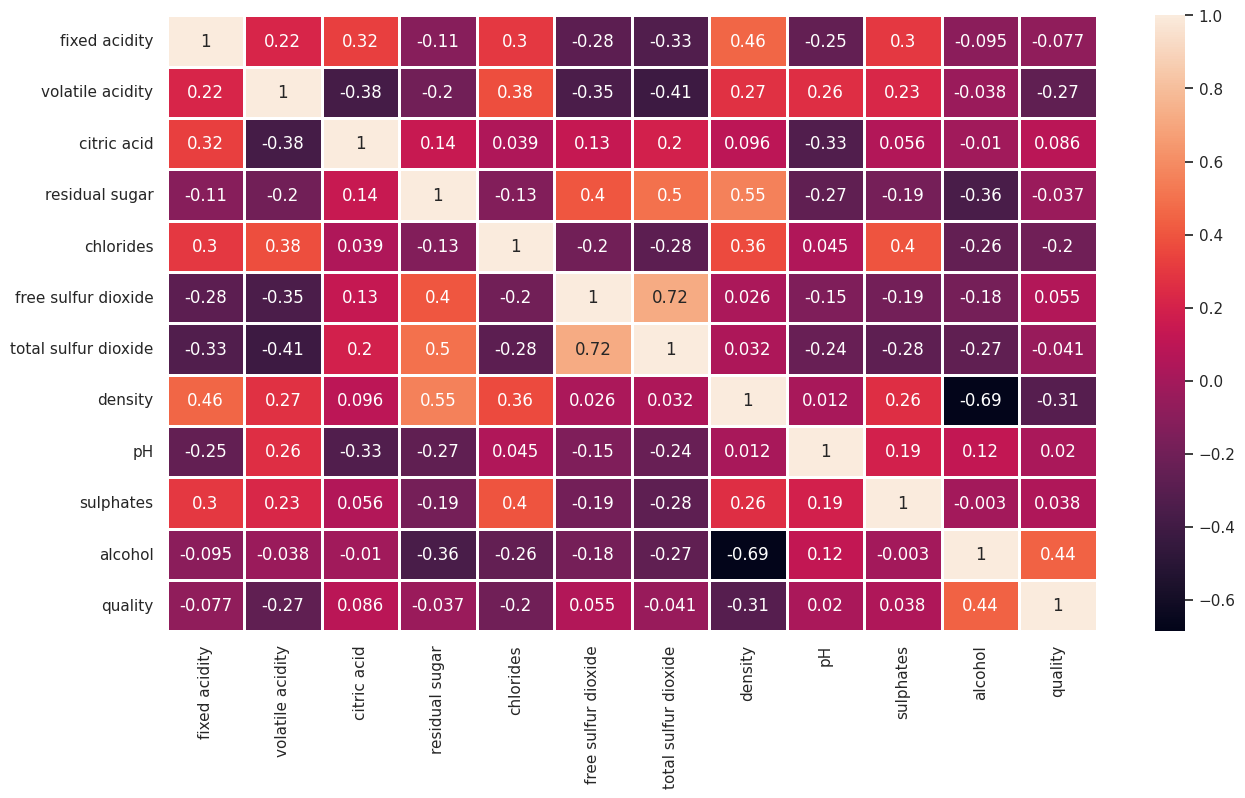

In [14]:
#Sử dụng heat map để tìm correlation
df = df.drop('type', axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidths=2)

In [15]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


- The heatmap matrix is the best way to see the relationship between number fields.
- Each coordinate of the matrix represents the correlation between 2 columns.
- The closer the Correlation is to 1, the more similar the two fields are.
- If fields (other than target) have high correlation, you can consider removing a column.
- If a field has high correlation with the target, then that field is considered an important feature.

**Some insights from the table above:**
- The **alcohol** ratio in wine co-variates with **quality** => the more alcohol, the higher quality the wine :D
- **alcohol** and **ph** have a weak, insignificant correlation
- **Citric acid** and **density** have a strong correlation with **fixed acidity**.
- **pH** inverses **density, fixed acidity, citric acid**, and **sulfates**.

=> However, we can't really drop any features, because the correlations are too low (highest being 0.44)

Text(0, 0.5, 'Features')

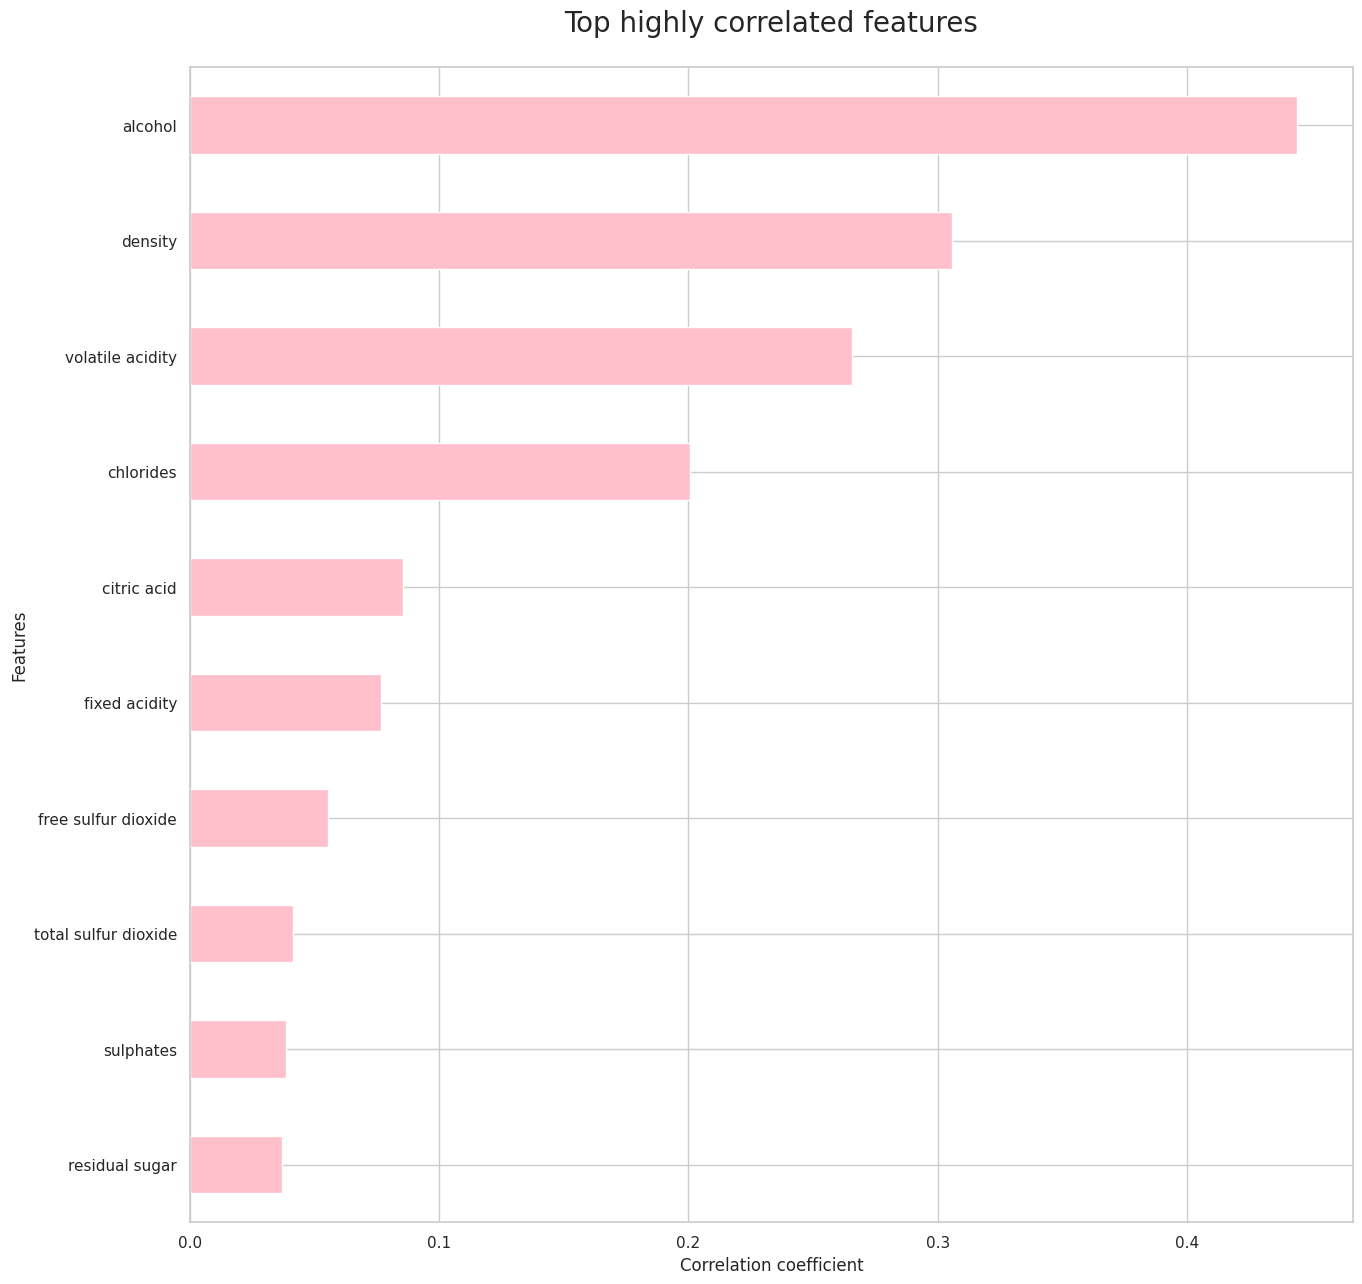

In [16]:
plt.figure(figsize=(15,15))
df.corr().quality.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].plot(kind='barh',color='pink')
# calculating the top 10 highest correlated features
# with respect to the target variable i.e. "quality"
plt.title("Top highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

<Figure size 1500x800 with 0 Axes>

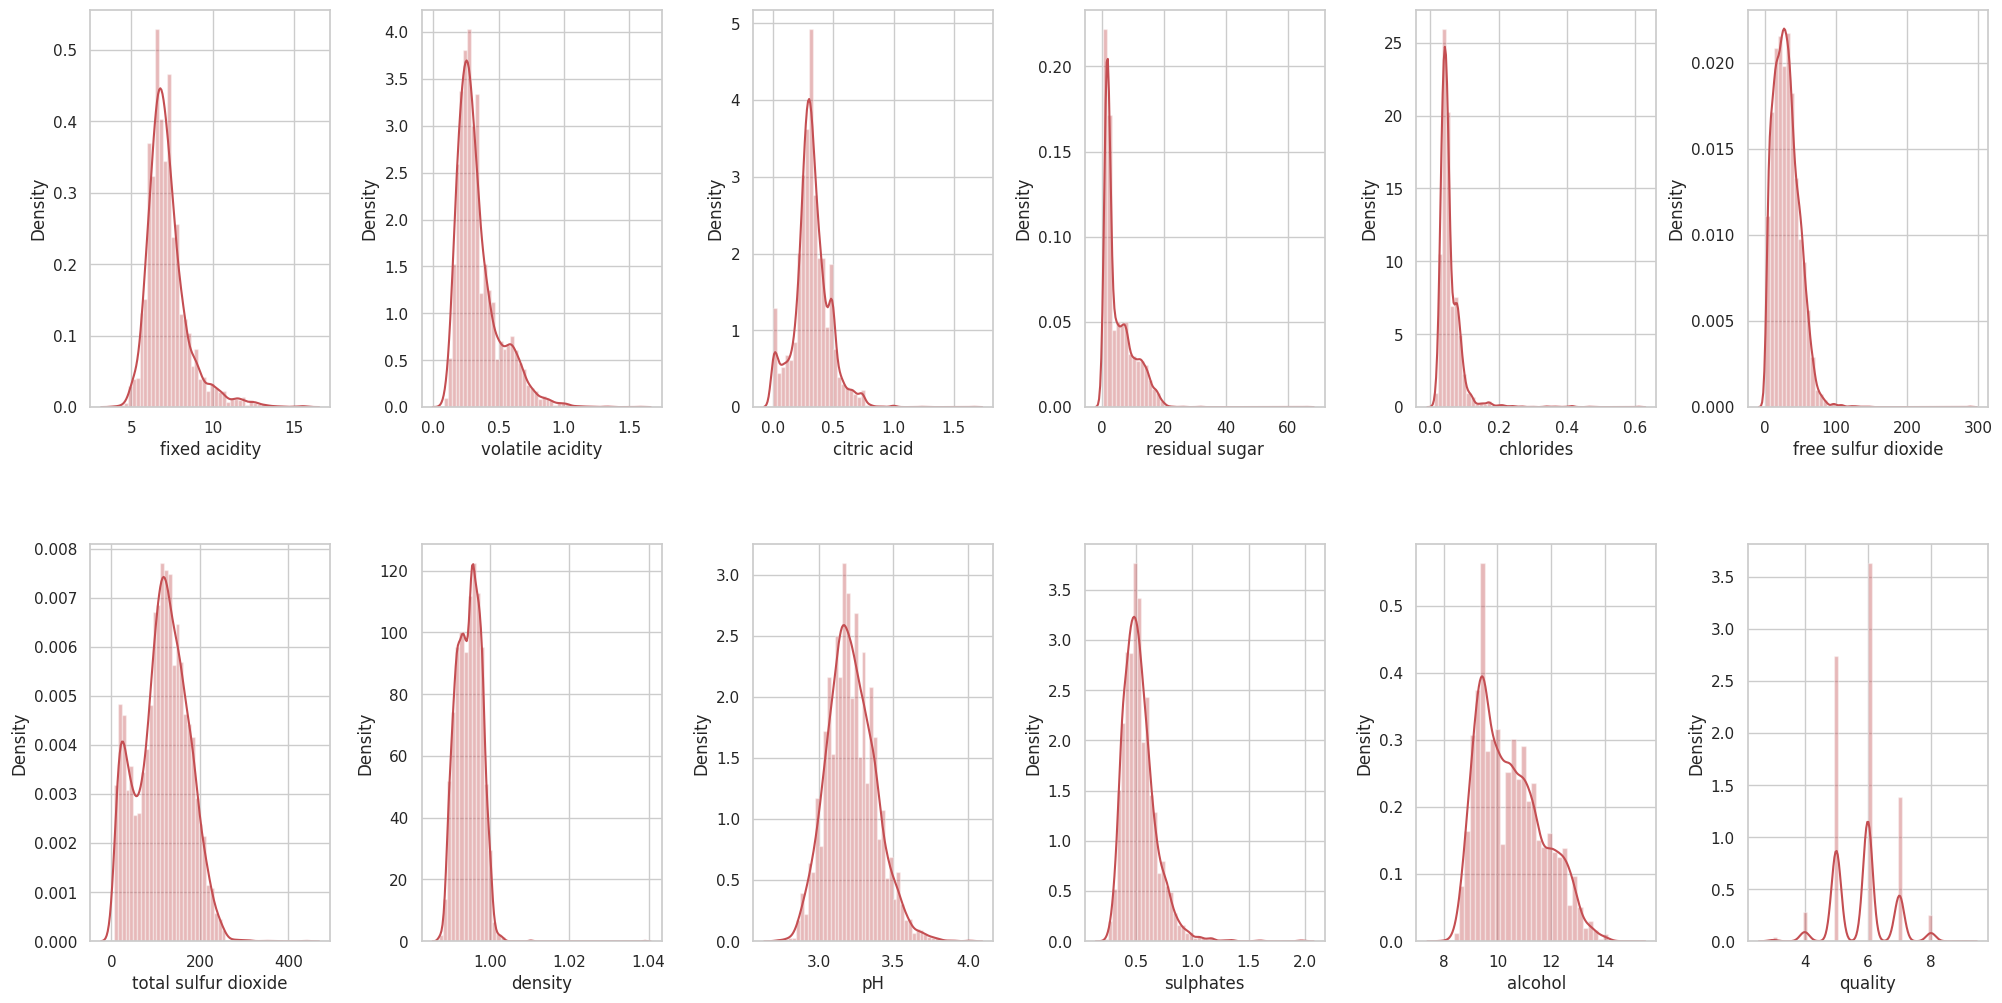

In [17]:
## Distribution of all features to check for skewed data
plt.figure(figsize=(15,8))
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, color='r', ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [18]:
from scipy.stats import skew
skew(df['alcohol'])

0.5655871101943215

**Key Takeaway**
- The above figures represent the distribution of each data column
- Some features have a normal distribution, the rest are mainly right skew distribution. The range of each feature is not too wide
- We need to transform the skewed features, using log transform will solve the problem!

### <a id='4'> 4. Feature Engineering

We need to take a few more steps to completely fix the data:
- Log transform
- Rescale data
- Deal with imbalanced data

#### <a id='4.1'> 4.1 Log transform

In [19]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

- correlation giữa các feature với target không cao lắm, nhưng có thể thấy các feature quan trọng là alcohol, density, volatile acidity

In [20]:
# hàm xử lí log_transform
def log_transform(col):
    return np.log(col[0])

df['alcohol'] = df[['alcohol']].apply(log_transform, axis=1)
df['free sulfur dioxide'] = df[['free sulfur dioxide']].apply(log_transform, axis=1)
df['sulphates'] = df[['sulphates']].apply(log_transform, axis=1)
df['pH'] = df[['pH']].apply(log_transform, axis=1)
df['residual sugar'] = df[['residual sugar']].apply(log_transform, axis=1)
df['total sulfur dioxide'] = df[['total sulfur dioxide']].apply(log_transform, axis=1)
df['fixed acidity']= df[['fixed acidity']].apply(log_transform, axis=1)
df['chlorides'] = df[['chlorides']].apply(log_transform, axis=1)
df['volatile acidity'] = df[['volatile acidity']].apply(log_transform, axis=1)
df['density'] = df[['density']].apply(log_transform, axis=1)

<Figure size 1500x800 with 0 Axes>

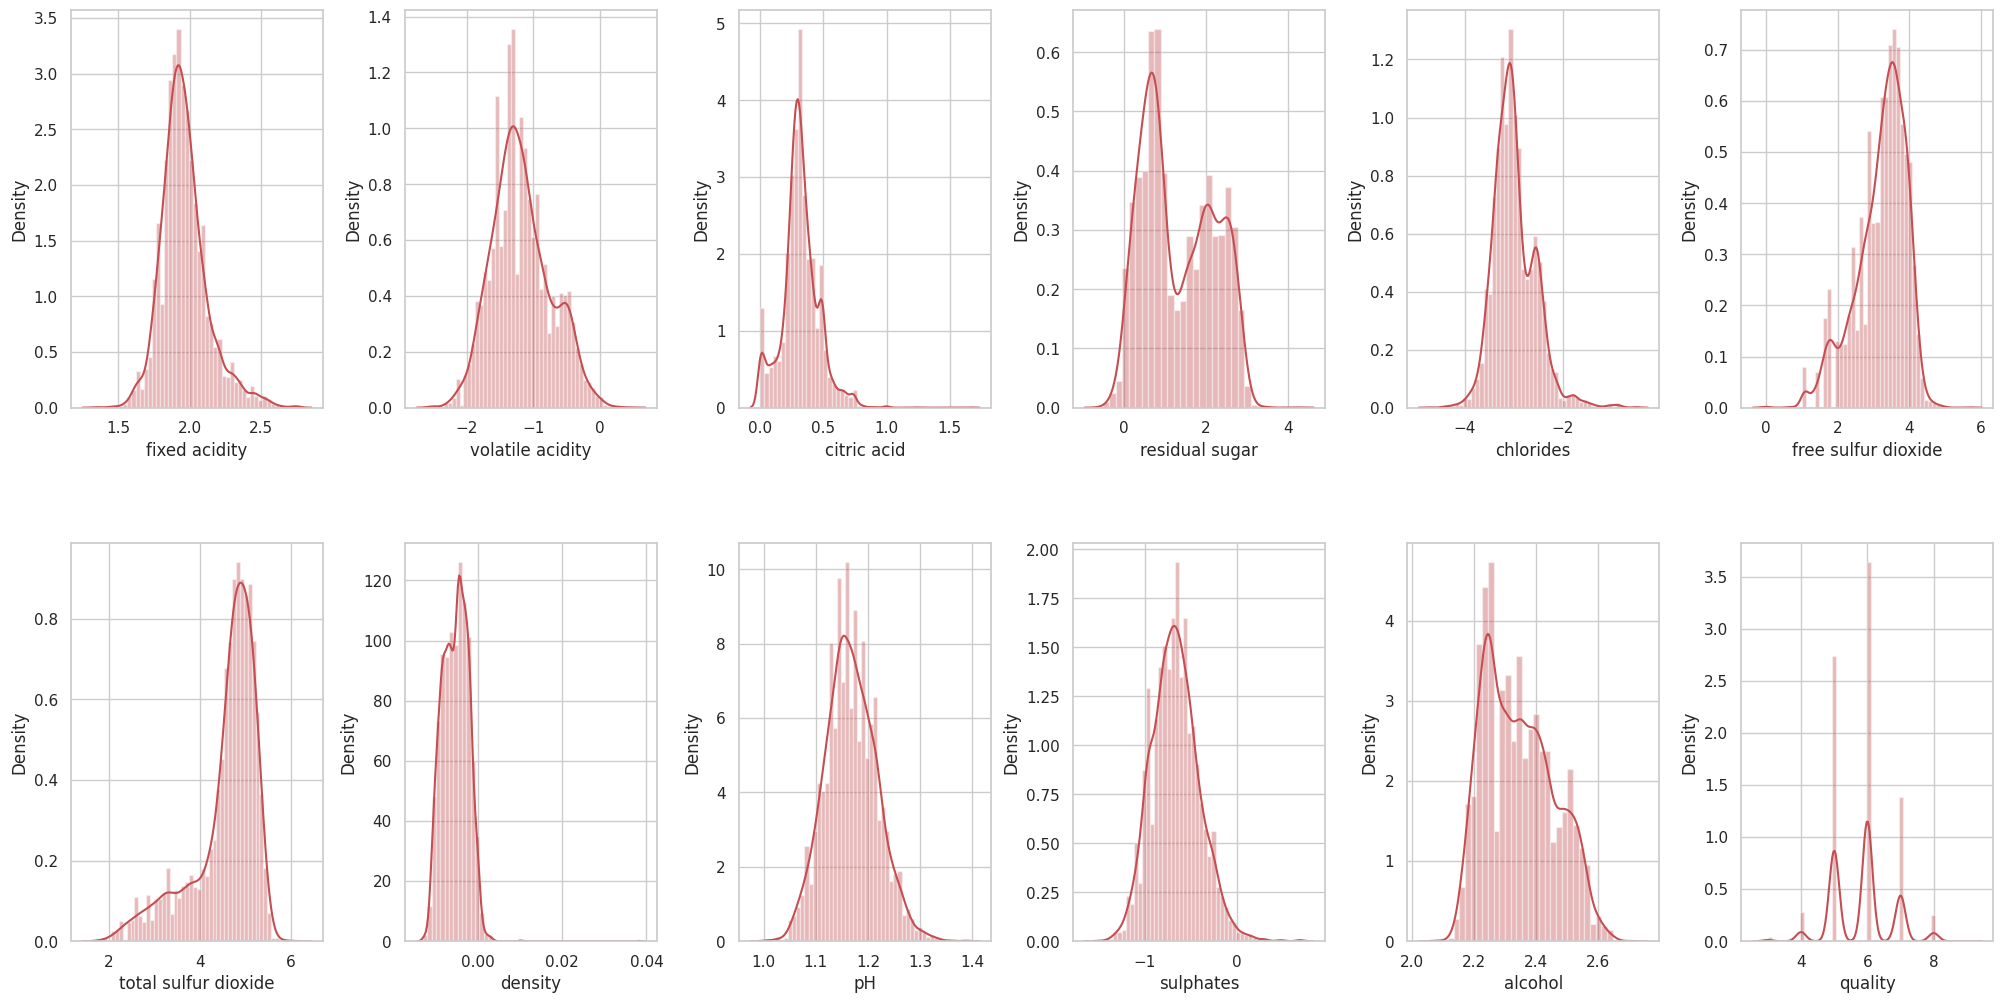

In [21]:
## Result
plt.figure(figsize=(15,8))
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, color='r', ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

#### <a id='4.2'> 4.2 Dealing with Imbalanced data

- The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing.



- In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [22]:
df_3 = df[df.quality==3]     # MINORITY
df_4 = df[df.quality==4]     # MINORITY
df_5 = df[df.quality==5]     # MAJORITY
df_6 = df[df.quality==6]     # MAJORITY
df_7 = df[df.quality==7]     # MINORITY
df_8 = df[df.quality==8]     # MINORITY
df_9 = df[df.quality==9]     # MINORITY

In [23]:
# Oversample MINORITY Class to make balance data :
from sklearn.utils import resample

df_3_upsampled = resample(df_3, replace=True, n_samples=2000)
df_4_upsampled = resample(df_4, replace=True, n_samples=2000)
df_7_upsampled = resample(df_7, replace=True, n_samples=2000)
df_8_upsampled = resample(df_8, replace=True, n_samples=2000)
df_9_upsampled = resample(df_9, replace=True, n_samples=2000)
# Decreases the rows of Majority one's to make balance data :
df_5_downsampled = df[df.quality==5].sample(n=2000).reset_index(drop=True)
df_6_downsampled = df[df.quality==6].sample(n=2000).reset_index(drop=True)

In [24]:
# Combine downsampled majority class with upsampled minority class
Balanced_df = pd.concat([df_3_upsampled, df_4_upsampled, df_7_upsampled,
                         df_8_upsampled, df_5_downsampled, df_6_downsampled, df_9_upsampled ]).reset_index(drop=True)


# Display new class counts
#Balanced_df.quality.value_counts()

<Axes: xlabel='quality', ylabel='count'>

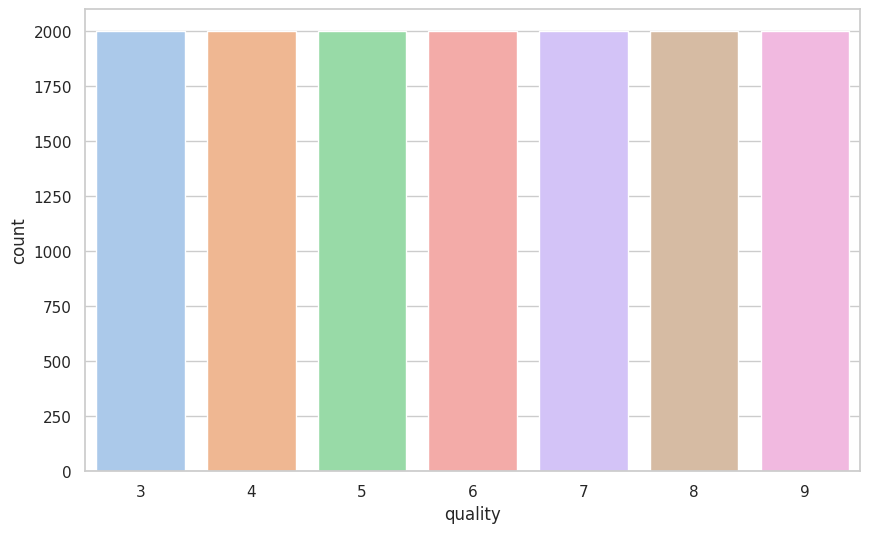

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=Balanced_df, order=[3, 4, 5, 6, 7, 8, 9], palette='pastel')

<Axes: xlabel='quality', ylabel='alcohol'>

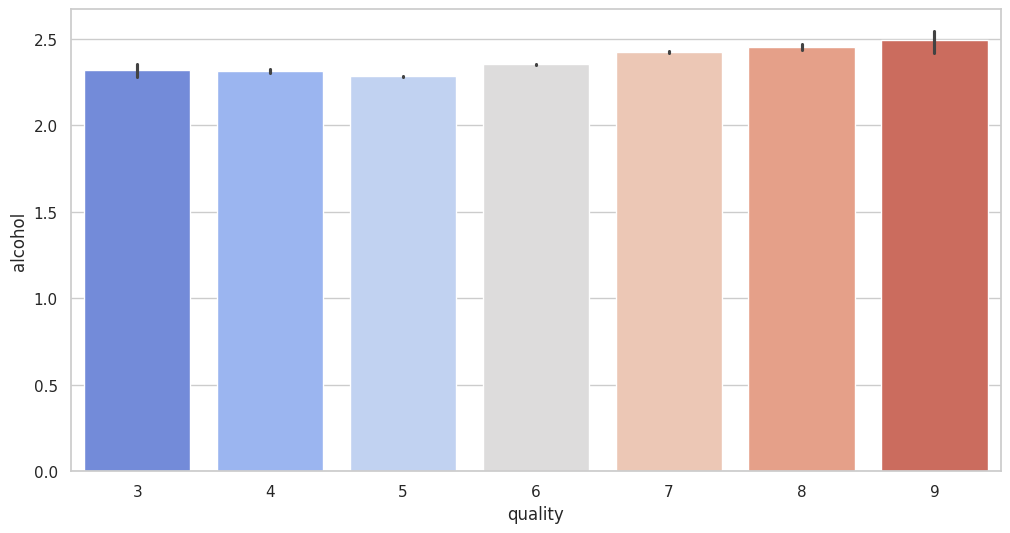

In [26]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'coolwarm')

Text(0, 0.5, 'Features')

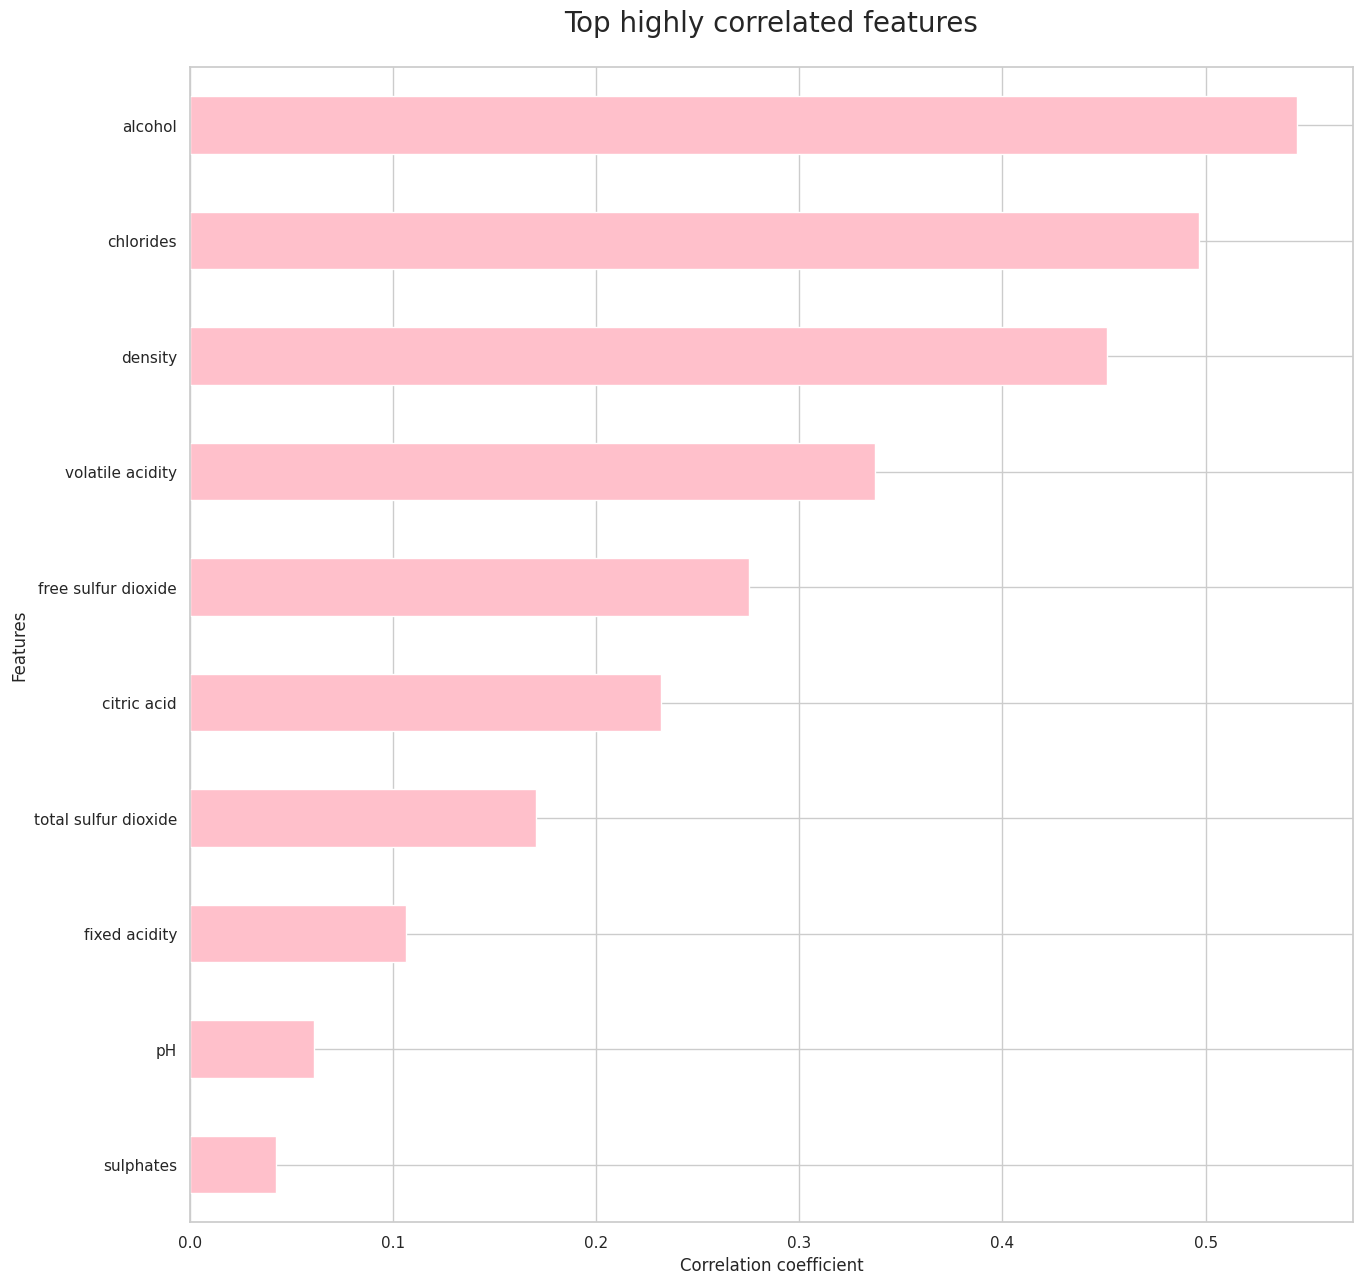

In [27]:
plt.figure(figsize=(15,15))
Balanced_df.corr().quality.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].plot(kind='barh',color='pink')
# calculating the top 10 highest correlated features
# with respect to the target variable i.e. "quality"
plt.title("Top highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

No changes in correlation between features and the target!

### <a id='5'> 5. Wine score classification with all 7 classes (quality from 3-9)

In [28]:
from sklearn.model_selection import train_test_split

cols = Balanced_df.columns
cols = list(cols.drop(['quality']))
y=Balanced_df["quality"]
X_train, X_test, y_train, y_test = train_test_split(Balanced_df.loc[:, cols], y, test_size=0.33, random_state=1)

In [29]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000
mean,1.970705,-1.136732,0.319274,1.267046,-3.096585,3.163807,4.536300,-0.005985,1.173794,-0.703055,2.376248
std,0.171173,0.462313,0.143419,0.836474,0.494344,0.784886,0.752507,0.003211,0.051587,0.260169,0.124134
min,1.360977,-2.525729,0.000000,-0.510826,-4.710531,0.000000,1.791759,-0.012954,1.000632,-1.514128,2.079442
25%,1.871802,-1.427116,0.260000,0.587787,-3.411248,2.772589,4.394449,-0.008940,1.141033,-0.891598,2.272126
50%,1.960095,-1.203973,0.320000,1.064711,-3.170086,3.332205,4.753590,-0.006068,1.175573,-0.733969,2.370244
75%,2.041220,-0.903868,0.400000,2.028148,-2.847312,3.663562,4.990433,-0.003205,1.211941,-0.527633,2.493205
max,2.747271,0.457425,1.660000,4.186620,-0.494296,5.666427,6.086775,0.038239,1.388791,0.693147,2.653242


#### <a id='5.1'> 5.1 Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
LR = Pipeline([
        ('scl', StandardScaler()),
        ('lr',  LinearRegression())
 ])

LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [31]:
x = LR.predict(X_train)

In [32]:
print("Train rmse: " + str(mean_squared_error(y_train, x)**0.5))
print("Test rmse: " + str(mean_squared_error(y_test, y_pred)**0.5))

Train rmse: 1.4483344954855562
Test rmse: 1.4452386286848105


#### <a id='5.2'> 5.2 Classification with 7 classes (quality from 3-9)

What is the best K for KNN?

In [33]:
# Trying out the default KNN parameter (K = 5)
from sklearn.neighbors import KNeighborsClassifier
KNN = Pipeline([
        ('scl', StandardScaler()),
        ('clf',  KNeighborsClassifier())
 ])

KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.97      1.00      0.98       676
           4       0.78      0.99      0.87       655
           5       0.66      0.56      0.60       667
           6       0.52      0.37      0.43       652
           7       0.70      0.68      0.69       666
           8       0.84      0.98      0.90       644
           9       1.00      1.00      1.00       660

    accuracy                           0.80      4620
   macro avg       0.78      0.80      0.78      4620
weighted avg       0.78      0.80      0.78      4620

[[676   0   0   0   0   0   0]
 [  0 647   8   0   0   0   0]
 [ 17 100 371 121  47  10   1]
 [  3  60 159 242 150  37   1]
 [  1  18  22  95 453  76   1]
 [  0   0   3   8   0 633   0]
 [  0   0   0   0   0   0 660]]


In [34]:
# Non-weighted
for n_neighbors in [1,3,5,10,15,20]:
    KNN = Pipeline([
        ('scl', StandardScaler()),
        ('clf',  KNeighborsClassifier(n_neighbors=n_neighbors))
     ])
    KNN.fit(X_train, y_train)
    scr = KNN.score(X_test, y_test)
    print("For ", n_neighbors,"neighbors, the score is ",scr)

For  1 neighbors, the score is  0.8696969696969697
For  3 neighbors, the score is  0.8281385281385282
For  5 neighbors, the score is  0.796969696969697
For  10 neighbors, the score is  0.7517316017316017
For  15 neighbors, the score is  0.7147186147186148
For  20 neighbors, the score is  0.6891774891774892


In [35]:
# Weighted (distance)
for n_neighbors in [1,3,5,10,15,20]:
    KNN = Pipeline([
        ('scl', StandardScaler()),
        ('clf',  KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance'))
     ])
    KNN.fit(X_train, y_train)
    scr = KNN.score(X_test, y_test)
    print("For weighted ", n_neighbors,"neighbors, the score is ",scr)

For weighted  1 neighbors, the score is  0.8696969696969697
For weighted  3 neighbors, the score is  0.8625541125541125
For weighted  5 neighbors, the score is  0.8543290043290044
For weighted  10 neighbors, the score is  0.8435064935064935
For weighted  15 neighbors, the score is  0.8383116883116883
For weighted  20 neighbors, the score is  0.8361471861471862


In [36]:
## Support Vector Machine
from sklearn.svm import SVC

SVM = Pipeline([
        ('scl', StandardScaler()),
        ('clf', SVC())
])

SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
labels = np.unique(y_test)
print(classification_report(y_test, y_pred))
cf_matrix_df = confusion_matrix(y_test, y_pred, labels=labels)
print(pd.DataFrame(cf_matrix_df, index=labels, columns=labels))

              precision    recall  f1-score   support

           3       0.93      1.00      0.96       676
           4       0.73      0.75      0.74       655
           5       0.58      0.57      0.57       667
           6       0.43      0.31      0.36       652
           7       0.48      0.57      0.52       666
           8       0.71      0.72      0.71       644
           9       1.00      1.00      1.00       660

    accuracy                           0.70      4620
   macro avg       0.69      0.70      0.70      4620
weighted avg       0.70      0.70      0.70      4620

     3    4    5    6    7    8    9
3  676    0    0    0    0    0    0
4   23  494   86   25   20    7    0
5   21  102  377  117   40    9    1
6   10   59  150  201  184   48    0
7    0   17   33  109  382  124    1
8    0    3    2   11  167  461    0
9    0    0    0    0    0    0  660


In [37]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier

KNN = Pipeline([
        ('clf', DecisionTreeClassifier())
])

KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)


labels = np.unique(y_test)
print(classification_report(y_test, y_pred))
cf_matrix_df = confusion_matrix(y_test, y_pred, labels=labels)
print(pd.DataFrame(cf_matrix_df, index=labels, columns=labels))

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       676
           4       0.90      1.00      0.95       655
           5       0.71      0.57      0.63       667
           6       0.62      0.53      0.57       652
           7       0.77      0.87      0.82       666
           8       0.92      1.00      0.96       644
           9       1.00      1.00      1.00       660

    accuracy                           0.85      4620
   macro avg       0.84      0.85      0.85      4620
weighted avg       0.85      0.85      0.85      4620

     3    4    5    6    7    8    9
3  676    0    0    0    0    0    0
4    0  655    0    0    0    0    0
5    4   51  382  165   54   11    0
6    2   15  142  348  115   29    1
7    1    3   17   49  581   15    0
8    0    0    0    0    0  644    0
9    0    0    0    0    0    0  660


In [38]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = Pipeline([
        ('clf', RandomForestClassifier())
])

RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

labels = np.unique(y_test)
print(classification_report(y_test, y_pred))
cf_matrix_df = confusion_matrix(y_test, y_pred, labels=labels)
print(pd.DataFrame(cf_matrix_df, index=labels, columns=labels))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       676
           4       0.96      1.00      0.98       655
           5       0.77      0.70      0.73       667
           6       0.65      0.61      0.63       652
           7       0.83      0.90      0.86       666
           8       0.97      1.00      0.99       644
           9       1.00      1.00      1.00       660

    accuracy                           0.89      4620
   macro avg       0.88      0.89      0.88      4620
weighted avg       0.88      0.89      0.88      4620

     3    4    5    6    7    8    9
3  676    0    0    0    0    0    0
4    0  655    0    0    0    0    0
5    1   17  468  164   17    0    0
6    0    5  138  396  106    7    0
7    0    2    3   53  598   10    0
8    0    0    0    0    0  644    0
9    0    0    0    0    0    0  660


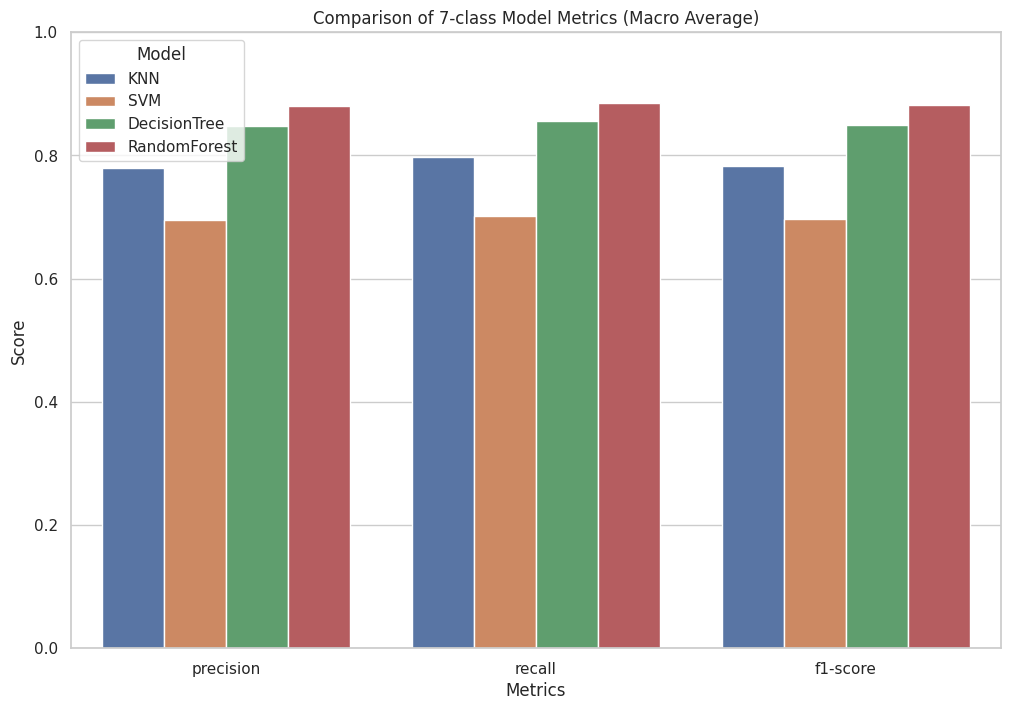

In [39]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the models in a pipeline format
models = {
    'KNN': Pipeline([('scl', StandardScaler()), ('clf', KNeighborsClassifier())]),
    'SVM': Pipeline([('scl', StandardScaler()), ('clf', SVC())]),
    'DecisionTree': Pipeline([('clf', DecisionTreeClassifier())]),
    'RandomForest': Pipeline([('clf', RandomForestClassifier())])
}

# Dictionary to hold the classification reports
results = {}

# Evaluate each model and store the results
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = classification_report(y_test, y_pred, output_dict=True)

# Prepare a DataFrame for the visualization
metrics_list = []
for model_name, report in results.items():
    for key, value in report.items():
        if isinstance(value, dict):  # Check if the value is a dictionary
            for metric in ['precision', 'recall', 'f1-score']:
                metrics_list.append({
                    'Model': model_name,
                    'Metric': metric,
                    'Score': value[metric],
                    'Support': value['support'],
                    'Class': key
                })
        else:  # This is for handling the 'accuracy' which is a float
            metrics_list.append({
                'Model': model_name,
                'Metric': 'accuracy',
                'Score': value,
                'Support': None,
                'Class': 'accuracy'
            })

# Convert the list of dictionaries to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Now plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df[metrics_df.Class == 'macro avg'])
plt.title('Comparison of 7-class Model Metrics (Macro Average)')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend(title='Model')
plt.ylim(0, 1)  # Adjust y-axis to show scores from 0 to 1
plt.show()


### <a id='6'> 6. Improvement by simplifying the problem: Classification with only 3 classes (excellent, good, bad)

In [40]:
## Let's split the quality into quality labels, with 3 classes of wine 'bad', 'good' and 'excellent'
Balanced_df['quality_label'] = Balanced_df.quality.apply(lambda q: 'bad' if q <= 5 else 'good' if q <= 7 else 'excellent')

In [41]:
cols = Balanced_df.columns
cols = list(cols.drop(['quality_label', 'quality']))
y=Balanced_df["quality_label"]
X_train, X_test, y_train, y_test = train_test_split(Balanced_df.loc[:, cols], y, test_size=0.33, random_state=2)

In [42]:
KNN = Pipeline([
        ('scl', StandardScaler()),
        ('clf',  KNeighborsClassifier())
 ])

KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

labels = np.unique(y_test)
print(classification_report(y_test,y_pred))

cf_matrix_df =  confusion_matrix(y_test, y_pred, labels=labels)
print(pd.DataFrame(cf_matrix_df, index=labels, columns=labels))

              precision    recall  f1-score   support

         bad       0.90      0.90      0.90      1974
   excellent       0.91      1.00      0.95      1343
        good       0.84      0.75      0.79      1303

    accuracy                           0.89      4620
   macro avg       0.88      0.88      0.88      4620
weighted avg       0.88      0.89      0.88      4620

            bad  excellent  good
bad        1778         14   182
excellent     0       1343     0
good        208        120   975


In [43]:
## Support Vector Machine
from sklearn.svm import SVC

SVM = Pipeline([
        ('scl', StandardScaler()),
        ('clf', SVC())
])

SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
labels = np.unique(y_test)
print(classification_report(y_test, y_pred))
cf_matrix_df = confusion_matrix(y_test, y_pred, labels=labels)
print(pd.DataFrame(cf_matrix_df, index=labels, columns=labels))

              precision    recall  f1-score   support

         bad       0.87      0.90      0.88      1974
   excellent       0.87      0.81      0.84      1343
        good       0.68      0.69      0.69      1303

    accuracy                           0.81      4620
   macro avg       0.81      0.80      0.80      4620
weighted avg       0.81      0.81      0.81      4620

            bad  excellent  good
bad        1769         10   195
excellent    24       1086   233
good        248        151   904


In [44]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier

KNN = Pipeline([
        ('clf', DecisionTreeClassifier())
])

KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)


labels = np.unique(y_test)
print(classification_report(y_test, y_pred))
cf_matrix_df = confusion_matrix(y_test, y_pred, labels=labels)
print(pd.DataFrame(cf_matrix_df, index=labels, columns=labels))

              precision    recall  f1-score   support

         bad       0.89      0.91      0.90      1974
   excellent       0.97      1.00      0.98      1343
        good       0.86      0.81      0.83      1303

    accuracy                           0.91      4620
   macro avg       0.91      0.91      0.91      4620
weighted avg       0.91      0.91      0.91      4620

            bad  excellent  good
bad        1796          4   174
excellent     0       1343     0
good        211         37  1055


In [45]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = Pipeline([
        ('clf', RandomForestClassifier())
])

RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

labels = np.unique(y_test)
print(classification_report(y_test, y_pred))
cf_matrix_df = confusion_matrix(y_test, y_pred, labels=labels)
print(pd.DataFrame(cf_matrix_df, index=labels, columns=labels))

              precision    recall  f1-score   support

         bad       0.93      0.92      0.92      1974
   excellent       1.00      1.00      1.00      1343
        good       0.88      0.89      0.89      1303

    accuracy                           0.94      4620
   macro avg       0.94      0.94      0.94      4620
weighted avg       0.94      0.94      0.94      4620

            bad  excellent  good
bad        1821          0   153
excellent     0       1343     0
good        143          1  1159


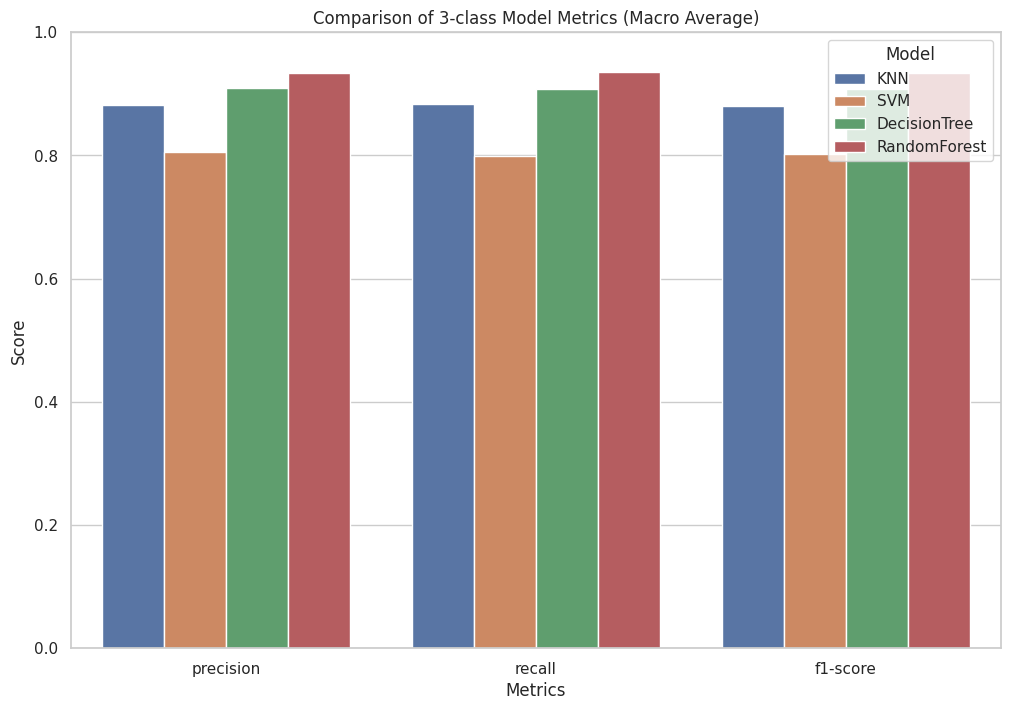

In [46]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the models in a pipeline format
models = {
    'KNN': Pipeline([('scl', StandardScaler()), ('clf', KNeighborsClassifier())]),
    'SVM': Pipeline([('scl', StandardScaler()), ('clf', SVC())]),
    'DecisionTree': Pipeline([('clf', DecisionTreeClassifier())]),
    'RandomForest': Pipeline([('clf', RandomForestClassifier())])
}

# Dictionary to hold the classification reports
results = {}

# Evaluate each model and store the results
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = classification_report(y_test, y_pred, output_dict=True)

# Prepare a DataFrame for the visualization
metrics_list = []
for model_name, report in results.items():
    for key, value in report.items():
        if isinstance(value, dict):  # Check if the value is a dictionary
            for metric in ['precision', 'recall', 'f1-score']:
                metrics_list.append({
                    'Model': model_name,
                    'Metric': metric,
                    'Score': value[metric],
                    'Support': value['support'],
                    'Class': key
                })
        else:  # This is for handling the 'accuracy' which is a float
            metrics_list.append({
                'Model': model_name,
                'Metric': 'accuracy',
                'Score': value,
                'Support': None,
                'Class': 'accuracy'
            })

# Convert the list of dictionaries to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Now plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df[metrics_df.Class == 'macro avg'])
plt.title('Comparison of 3-class Model Metrics (Macro Average)')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend(title='Model')
plt.ylim(0, 1)  # Adjust y-axis to show scores from 0 to 1
plt.show()
